In [1]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
from urllib.request import urlretrieve
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sys
import os


# Enable inline plotting
%matplotlib inline

print('Python version ' + sys.version)
print('Numpy version ' + np.__version__)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)
print('\r{}: [#] Begin program.'.format(datetime.strftime(datetime.now(),"[%Y.%m.%d-%H:%M:%S.%f]")))

Python version 3.6.0 |Anaconda 4.3.1 (64-bit)| (default, Dec 23 2016, 12:22:00) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
Numpy version 1.11.3
Pandas version 0.19.2
Matplotlib version 2.0.0
[2017.10.17-02:22:32.376534]: [#] Begin program.


In [2]:
time_format = "[%Y.%m.%d-%H:%M:%S.%f]"

def times():
    return str(datetime.strftime(datetime.now(), time_format))

In [3]:
def download_file(file):
    destination = file
    url = 'http://cdn.gea.esac.esa.int/Gaia/tgas_source/csv/' + file
    urlretrieve(url, destination)
    print('\r{}: [*] End download {}..'.format(times(), file))

In [4]:
for i in np.arange(16):
    n = '0'*(3 - len(str(i)))+str(i)
    file = 'TgasSource_000-000-'+n+'.csv'
    end_file = '.gz'
    if not os.path.isfile(file):
        print('{}: [-] File {} not found'.format(times(), file))
        if not os.path.isfile(file + end_file):
            print('{}: [-] Zip {} not found\n{}: [/] Start download {}..'.format(times(), file + end_file,time, file + end_file), end='')
            download_file(file + end_file)
        print('{}: [.] Begin unzip {}'.format(times(), file + end_file), end = '')
        os.system("gzip -d " + file + end_file)
        print('\r{}: [+] End unzip {}'.format(times(), file + end_file))
    else:
        print('{}: [+] File {} found'.format(times(), file))
print('\n{}: [!] All files found.'.format(times()))

[2017.10.17-02:22:32.626836]: [+] File TgasSource_000-000-000.csv found
[2017.10.17-02:22:32.628519]: [+] File TgasSource_000-000-001.csv found
[2017.10.17-02:22:32.629386]: [+] File TgasSource_000-000-002.csv found
[2017.10.17-02:22:32.630260]: [+] File TgasSource_000-000-003.csv found
[2017.10.17-02:22:32.631118]: [+] File TgasSource_000-000-004.csv found
[2017.10.17-02:22:32.631919]: [+] File TgasSource_000-000-005.csv found
[2017.10.17-02:22:32.632721]: [+] File TgasSource_000-000-006.csv found
[2017.10.17-02:22:32.633523]: [+] File TgasSource_000-000-007.csv found
[2017.10.17-02:22:32.634372]: [+] File TgasSource_000-000-008.csv found
[2017.10.17-02:22:32.634993]: [+] File TgasSource_000-000-009.csv found
[2017.10.17-02:22:32.636030]: [+] File TgasSource_000-000-010.csv found
[2017.10.17-02:22:32.636653]: [+] File TgasSource_000-000-011.csv found
[2017.10.17-02:22:32.637681]: [+] File TgasSource_000-000-012.csv found
[2017.10.17-02:22:32.638442]: [+] File TgasSource_000-000-013.cs

In [5]:
%%time

file = 'TgasSource_000-000-000.csv'
print('{}: [/] Begin read file {}..'.format(times(),file))
df0 = pd.read_csv(file)
time = times()
print('{}: [/] End read file {}.'.format(times(), file))
l = len(df0)
print('{}: [/] len file = {}'.format(times(), l))


for i in np.arange(1,16):
    n = '0'*(3 - len(str(i)))+str(i)
    file = 'TgasSource_000-000-'+n+'.csv'
    print('{}: [/] Begin read file {}..'.format(times(),file))
    df = pd.read_csv(file)
    print('{}: [/] End read file {}.'.format(times(), file))
    l = len(df)
    df0 = df0.append(df)
    ldf = len(df0)
    df._clear_item_cache()
    print('{}: [/] len file = {}, len_df = {}'.format(times(), l, ldf))
print('{}: [/] End'.format(times()))

[2017.10.17-02:22:32.732746]: [/] Begin read file TgasSource_000-000-000.csv..
[2017.10.17-02:22:36.293219]: [/] End read file TgasSource_000-000-000.csv.
[2017.10.17-02:22:36.293378]: [/] len file = 134865
[2017.10.17-02:22:36.293480]: [/] Begin read file TgasSource_000-000-001.csv..
[2017.10.17-02:22:39.902793]: [/] End read file TgasSource_000-000-001.csv.
[2017.10.17-02:22:40.051734]: [/] len file = 134865, len_df = 269730
[2017.10.17-02:22:40.051996]: [/] Begin read file TgasSource_000-000-002.csv..
[2017.10.17-02:22:42.981181]: [/] End read file TgasSource_000-000-002.csv.
[2017.10.17-02:22:43.153814]: [/] len file = 134865, len_df = 404595
[2017.10.17-02:22:43.154031]: [/] Begin read file TgasSource_000-000-003.csv..
[2017.10.17-02:22:46.198817]: [/] End read file TgasSource_000-000-003.csv.
[2017.10.17-02:22:46.477799]: [/] len file = 134865, len_df = 539460
[2017.10.17-02:22:46.478158]: [/] Begin read file TgasSource_000-000-004.csv..
[2017.10.17-02:22:49.356909]: [/] End read

https://gaia.esac.esa.int/documentation/GDR1/datamodel/Ch1/tgas_source.html

hip                              float64
tycho2_id                         object
solution_id                        int64
source_id                          int64
random_index                       int64
ref_epoch                        float64
ra                               float64
ra_error                         float64
dec                              float64
dec_error                        float64
parallax                         float64
parallax_error                   float64
pmra                             float64
pmra_error                       float64
pmdec                            float64
pmdec_error                      float64
ra_dec_corr                      float64
ra_parallax_corr                 float64
ra_pmra_corr                     float64
ra_pmdec_corr                    float64
dec_parallax_corr                float64
dec_pmra_corr                    float64
dec_pmdec_corr                   float64
parallax_pmra_corr               float64
parallax_pmdec_c

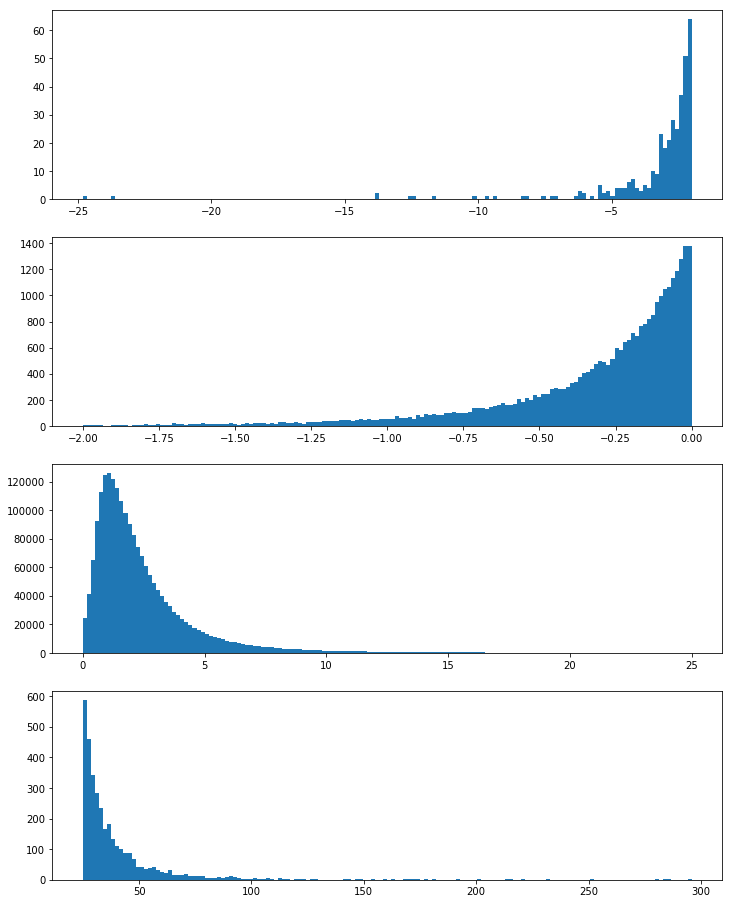

In [6]:
%%time

#matplotlib.style.use('ggplot')
plt.figure(figsize=(12,16))
print(df0.dtypes)

ax = plt.subplot(411)
ax.hist(df0['parallax'].values, bins=150, range=[df0['parallax'].min(), -2])
print('{}: [/] End plot hist1.'.format(times()))

ax = plt.subplot(412)
ax.hist(df0['parallax'].values, bins=150, range=[-2, -0])
print('{}: [/] End plot hist1.'.format(times()))

ax = plt.subplot(413)
ax.hist(df0['parallax'].values, bins=150, range=[0,25])
print('{}: [/] End plot hist2.'.format(times()))

ax = plt.subplot(414)
ax.hist(df0['parallax'].values, bins=150, range=[25,df0['parallax'].max()])
print('{}: [/] End plot hist2.'.format(times()))
#plt.show()
plt.savefig('hist_paralax.png',dpi=100,format='png')


CPU times: user 1min 13s, sys: 1.21 s, total: 1min 14s
Wall time: 1min 14s


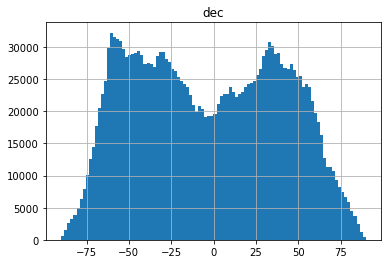

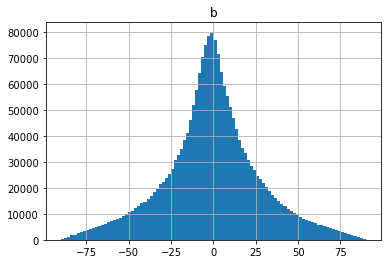

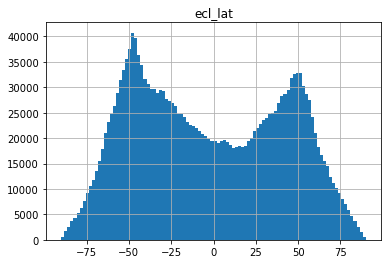

In [7]:
%%time

#df0['parallax'].hist(bins=2, range=[df0['parallax'].min(), -0], figsize=(25,8))
#df0.hist('ra')
df0.loc[df0['ra'] > 180,'ra'] = df0.loc[df0['ra'] > 180].ra - 360
#df0.hist('ra')
df0.loc[df0['l'] > 180,'l'] = df0.loc[df0['l'] > 180].l - 360
df0.loc[df0['ecl_lon'] > 180,'ecl_lon'] = df0.loc[df0['ecl_lon'] > 180].ecl_lon - 360

df0.hist('dec', bins=100)
df0.hist('b', bins=100)
df0.hist('ecl_lat', bins=100)
#df0.plot('ecl_lon','ecl_lat')

i = (62*60*60+52*60+18.295)/3600
ome = (282*60*60 + 51*60 + 34.131)/3600
L0 = (32*60*60 + 55*60 + 54.905)/3600


x0 = [(np.arctan2((np.sin(y*np.pi/180)*np.sin(i*np.pi/180)+ np.cos(y*np.pi/180)*np.cos(i*np.pi/180)*np.sin((x - ome)*np.pi/180)), (np.cos(y*np.pi/180)*np.cos((x- ome)*np.pi/180)))/np.pi*180 + L0) for y,x in zip(df0['dec'],df0['ra']) ]
# if ((np.arctan((np.sin(y*np.pi/180)*np.sin(i*np.pi/180) + np.cos(y*np.pi/180)*np.cos(i*np.pi/180)*np.sin((x - ome)*np.pi/180)) / (np.cos(y*np.pi/180)*np.cos((x - ome)*np.pi/180)))/np.pi*180 + L0) < 180) else (np.arctan((np.sin(y*np.pi/180)*np.sin(i*np.pi/180) + np.cos(y*np.pi/180)*np.cos(i*np.pi/180)*np.sin((x - ome)*np.pi/180)) / (np.cos(y*np.pi/180)*np.cos((x - ome)*np.pi/180)))/np.pi*180 + L0 - 360)
y0 = [np.arcsin(np.sin(y*np.pi/180)*np.cos(i*np.pi/180) - np.cos(y*np.pi/180)*np.sin(i*np.pi/180)*np.sin(x*np.pi/180 - ome*np.pi/180))/np.pi*180 for y,x in zip(df0['dec'],df0['ra'])]
x0 = [x if x<180 else x - 360 for x in x0]

2.70075354094
-3.22799552188
4.84813681109536e-09
CPU times: user 1.34 s, sys: 0 ns, total: 1.34 s
Wall time: 1.32 s


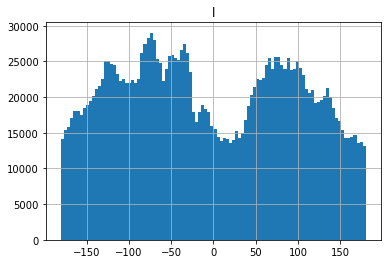

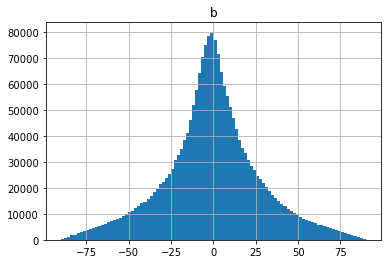

In [8]:
%%time

#plt.figure()
#ax = plt.subplot(111)
#ax.hist(df0.l-x0,bins=1000)
#plt.figure()
#ax = plt.subplot(111)
#ax.hist(y0,bins=100)
print(max(df0.l-x0)*60*60)
print(min(df0.l-x0)*60*60)
print(0.001/60/60/180*np.pi)


df0.hist('l', bins=100)
df0.hist('b', bins=100)

In [9]:
#plt.figure(figsize=(16,9))
#print('{}: [/] Begin plot paralax.'.format(times()))
def hammeri(i):
    print('{}: [/] plot paralax = {}.'.format(times(),i))
    plt.clf()
    ax = plt.subplot(111, projection = 'hammer')
    ax.scatter(
        df0[df0['parallax'] // 1 == i].ra*np.pi/180,
        df0[df0['parallax'] // 1 == i].dec*np.pi/180,
        s = (10*i*i+4*i+2)/(i*i+100*i+8),
        marker='o',
        color = 'r',
        linewidths=-1./(i+1.)+1.2,
        label = 'paralax = {}'.format(i)
    )
    #ax.contour(X,Y,Z,10,colors='k')
    #ax.scatter([0],[np.pi/2],color = 'g')#,51.1,marker='o',color = 'r',linewidths=0.01)
    #''''o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X''''
    plt.legend(loc='best');
    plt.grid(color='k', linestyle='--', linewidth=0.5)
    params = matplotlib.figure.SubplotParams(left=.02, right=.98, top=.99, bottom=.01)
    plt.tight_layout()
    plt.savefig('hammer_paralax-'+str(i)+'.png',dpi=100,format='png')



#for i in np.arange(int(df0['parallax'].max() // 1 + 1)):
#    hammeri(i)
#plt.show()

[2017.10.17-02:24:59.685343]: [/] Begin plot_hammer paralax.
[2017.10.17-02:24:59.685521]: [/] Begin plot_hammer paralax ra, dec.


/home/p_a/anaconda3/lib/python3.6/site-packages/matplotlib/projections/geo.py:394: RuntimeWarning: invalid value encountered in sqrt
  z = np.sqrt(1.0 - quarter_x*quarter_x - half_y*half_y)


[2017.10.17-02:25:47.839318]: [/] End plot_hammer paralax.


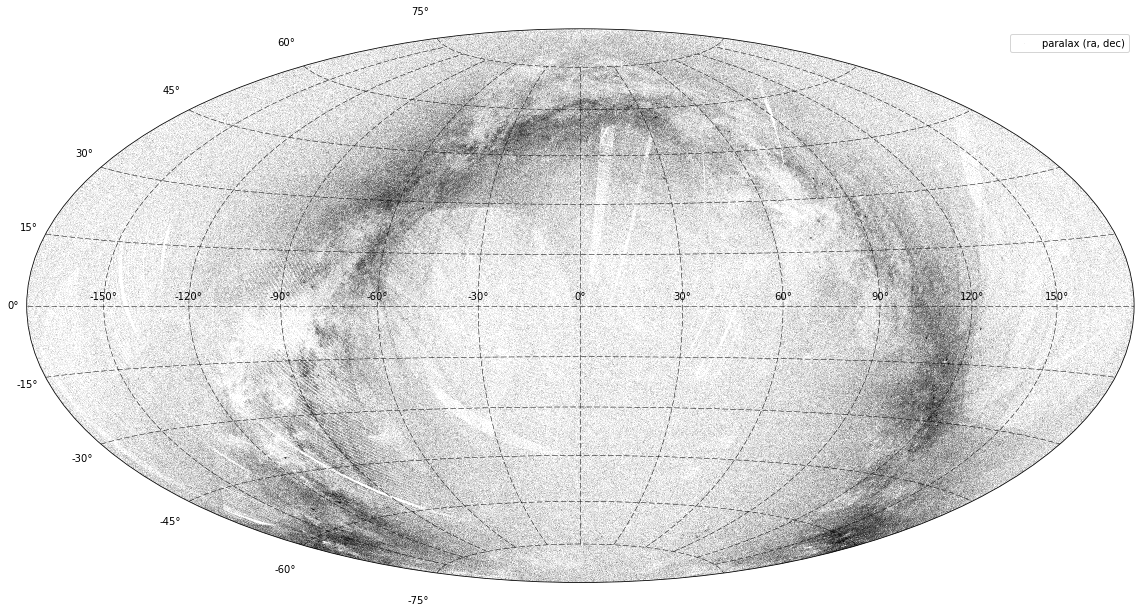

[2017.10.17-02:26:06.536308]: [/] Begin plot_hammer paralax l, b.
[2017.10.17-02:26:52.603126]: [/] End plot_hammer paralax.


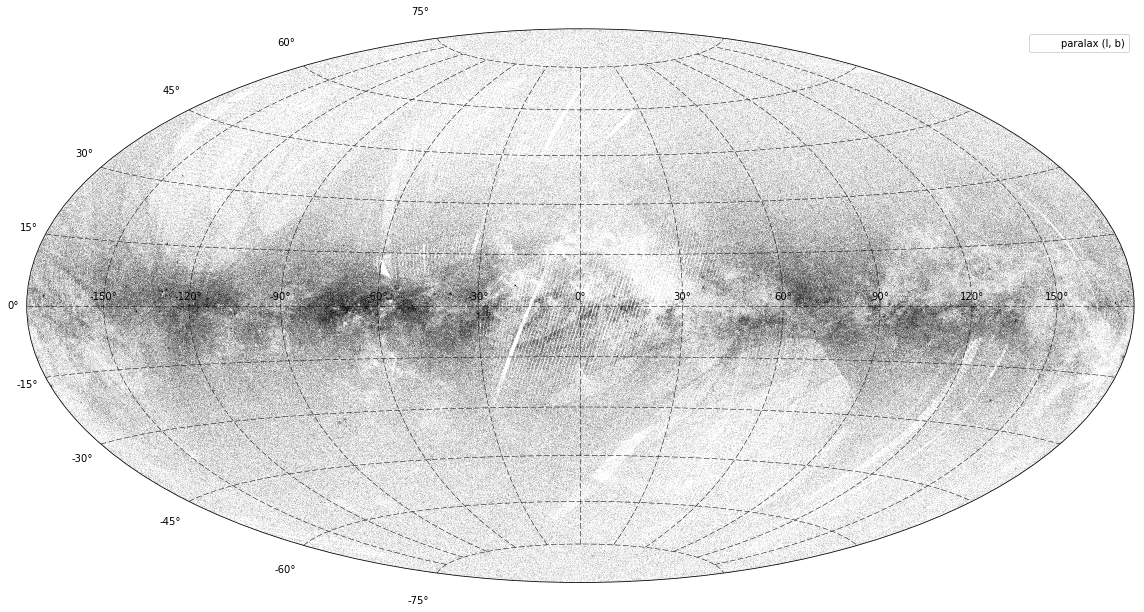

[2017.10.17-02:27:09.516901]: [/] Begin plot_hammer paralax ecl_lon, ecl_lat.
[2017.10.17-02:27:55.709277]: [/] End plot_hammer paralax.


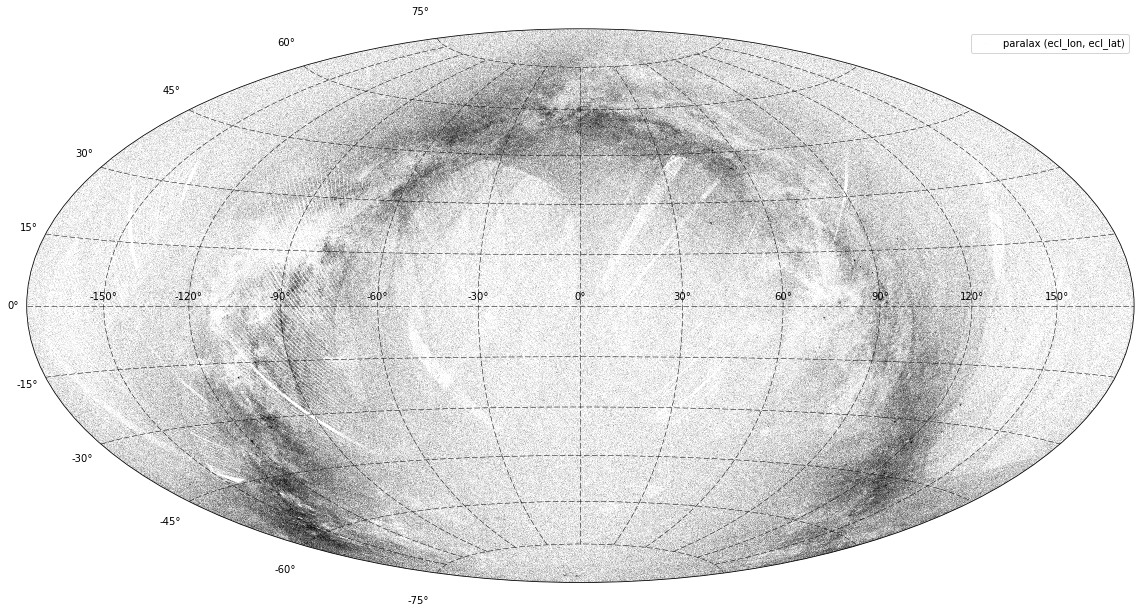

[2017.10.17-02:28:13.377327]: [/] Begin plot_hammer paralax.
CPU times: user 3min 10s, sys: 3.76 s, total: 3min 13s
Wall time: 3min 13s


In [10]:
%%time

plt.figure(figsize=(16,9))
print('{}: [/] Begin plot_hammer paralax.'.format(times()))
def hammer(x,y):
    print('{}: [/] Begin plot_hammer paralax {}, {}.'.format(times(),x,y))
    plt.figure(figsize=(16,9))
    plt.clf()
    ax = plt.subplot(111, projection = 'hammer')
    ax.scatter(
        df0[x]*np.pi/180,
        df0[y]*np.pi/180,
        s = 0.05,
        marker='o',
        color = 'k',
        linewidths=0.01,
        label = 'paralax ({}, {})'.format(x,y)
    )
    #ax.contour(X,Y,Z,10,colors='k')
    #ax.scatter([0],[np.pi/2],color = 'g')#,51.1,marker='o',color = 'r',linewidths=0.01)
    #''''o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X''''
    plt.legend(loc='best');
    plt.grid(color='k', linestyle='--', linewidth=0.5)
    params = matplotlib.figure.SubplotParams(left=.02, right=.98, top=.99, bottom=.01)
    plt.tight_layout()
    plt.savefig('hammer_'+str(x)+'_'+str(y)+'.png',dpi=1000,format='png')
    print('{}: [/] End plot_hammer paralax.'.format(times()))
    plt.show()
    
hammer('ra','dec')
hammer('l','b')
hammer('ecl_lon','ecl_lat')
#plt.figure(figsize=(16,9))
print('{}: [/] Begin plot_hammer paralax.'.format(times()))
def hammer2(x,y):
    print('{}: [/] Begin plot_hammer paralax {}, {}.'.format(times(),x,y))
    plt.figure(figsize=(16,9))
    plt.clf()
    ax = plt.subplot(111, projection = 'hammer')
    i = (62*60*60+52*60+18.295)/3600
    ome = (282*60*60 + 51*60 + 34.131)/3600
    L0 = (32*60*60 + 55*60 + 54.905)/3600
    
    x0 = [((np.arctan((np.sin(y*np.pi/180)*np.sin(i*np.pi/180) + np.cos(y*np.pi/180)*np.cos(i*np.pi/180)*np.sin((x - ome)*np.pi/180)) / (np.cos(y*np.pi/180)*np.cos((x- ome)*np.pi/180)))/np.pi*180 + L0)/180*np.pi) if ((np.arctan((np.sin(y*np.pi/180)*np.sin(i*np.pi/180) + np.cos(y*np.pi/180)*np.cos(i*np.pi/180)*np.sin((x - ome)*np.pi/180)) / (np.cos(y*np.pi/180)*np.cos((x - ome)*np.pi/180)))/np.pi*180 + L0) <= 180) else (np.arctan((np.sin(y*np.pi/180)*np.sin(i*np.pi/180) + np.cos(y*np.pi/180)*np.cos(i*np.pi/180)*np.sin((x - ome)*np.pi/180)) / (np.cos(y*np.pi/180)*np.cos((x - ome)*np.pi/180)))/np.pi*180 + L0 - 360)/180*np.pi for y,x in zip(df0[y],df0[x])]
    y0 = [np.arcsin(np.sin(y)*np.cos(i) - np.cos(y)*np.sin(i)*np.sin(x - ome))*np.pi/180 for y,x in zip(df0[y],df0[x])]
    ax.scatter(
        x0,
        y0,
        s = 0.05,
        marker='o',
        color = 'k',
        linewidths=0.01,
        label = 'paralax ({}, {})'.format(x,y)
    )
    #ax.contour(X,Y,Z,10,colors='k')
    #ax.scatter([0],[np.pi/2],color = 'g')#,51.1,marker='o',color = 'r',linewidths=0.01)
    #''''o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X''''
    plt.legend(loc='best');
    plt.grid(color='k', linestyle='--', linewidth=0.5)
    params = matplotlib.figure.SubplotParams(left=.02, right=.98, top=.99, bottom=.01)
    plt.tight_layout()
    plt.savefig('hammer_'+str(x)+'_'+str(y)+'.png',dpi=1000,format='png')
    print('{}: [/] End plot_hammer paralax.'.format(times()))
#hammer2('ra','dec')


[2017.10.17-02:28:13.455195]: [/] Begin plot_hex_hammer paralax l, b, 50.
[2017.10.17-02:28:44.578135]: [/] End plot_hammer paralax.


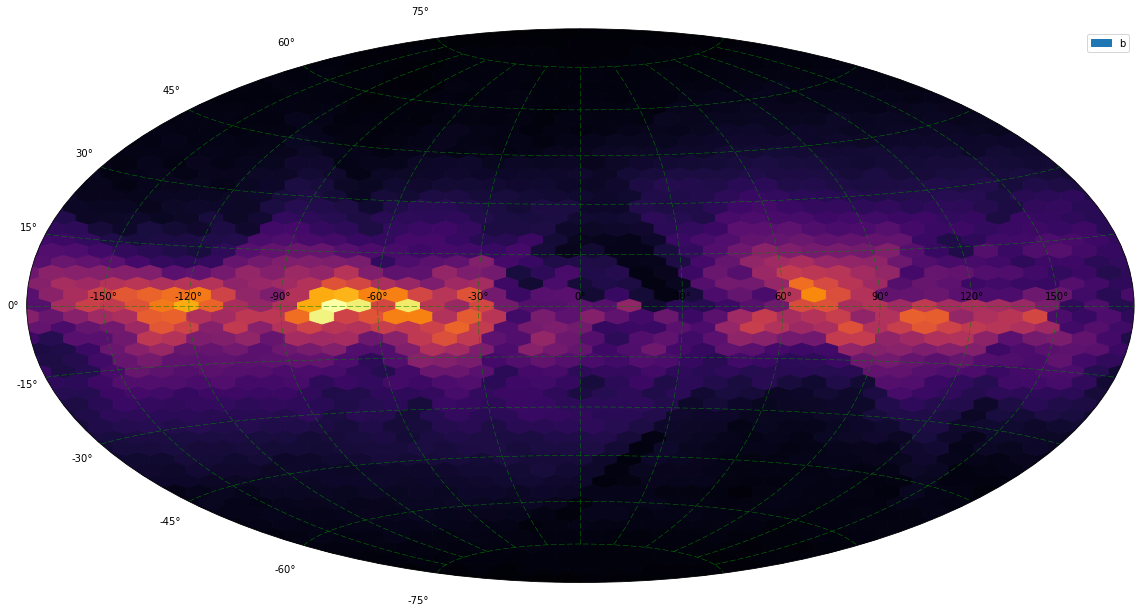

[2017.10.17-02:28:46.117004]: [/] Begin plot_hex_hammer paralax l, b, 100.
[2017.10.17-02:29:21.324770]: [/] End plot_hammer paralax.


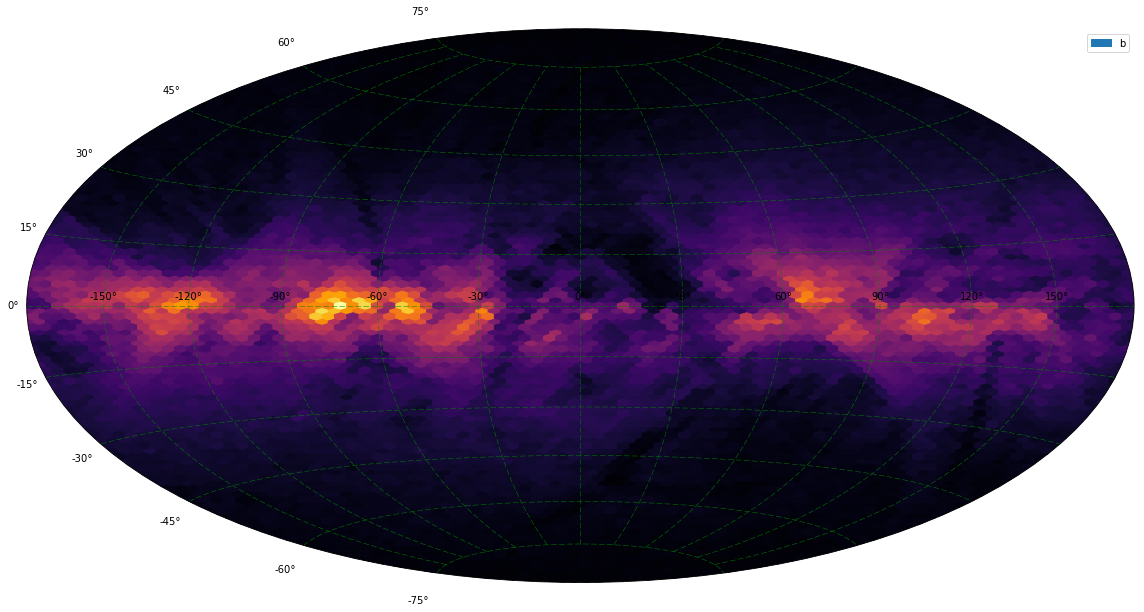

[2017.10.17-02:29:25.888039]: [/] Begin plot_hex_hammer paralax l, b, 250.
[2017.10.17-02:30:29.174748]: [/] End plot_hammer paralax.


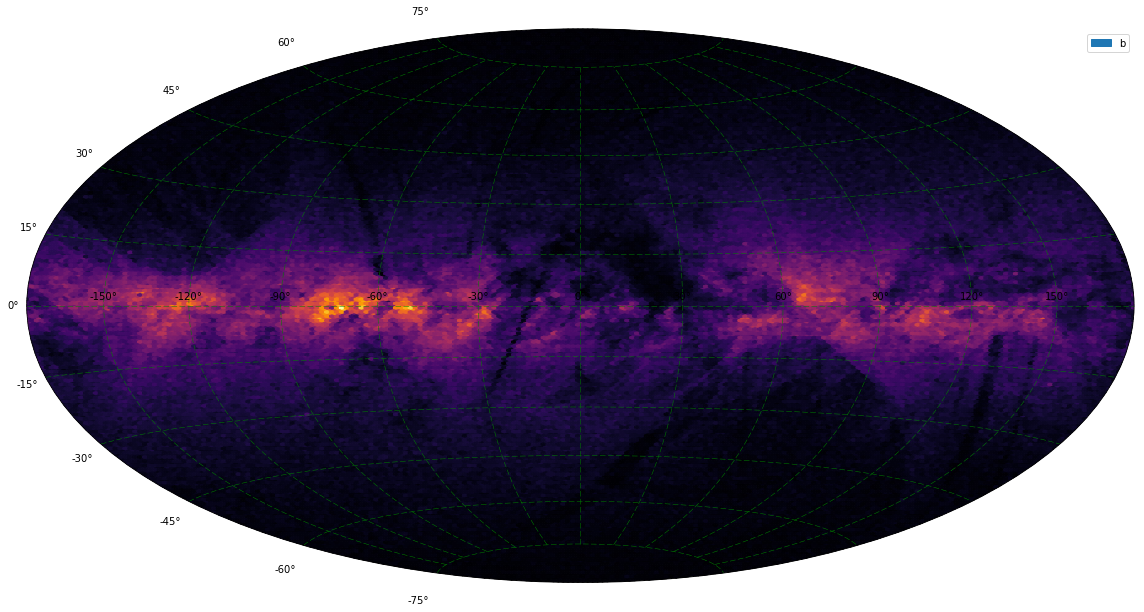

[2017.10.17-02:30:56.671046]: [/] Begin plot_hex_hammer paralax l, b, 700.
[2017.10.17-02:35:04.830697]: [/] End plot_hammer paralax.


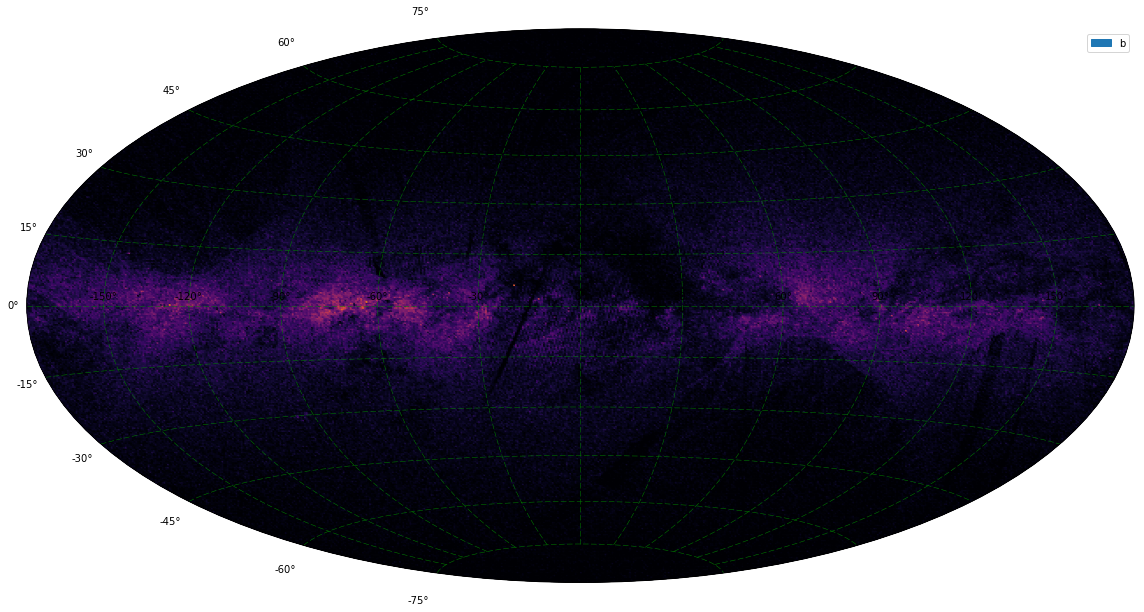

CPU times: user 10min 5s, sys: 1.42 s, total: 10min 7s
Wall time: 10min 8s


In [11]:
%%time

def hexbinmy(x,y,gridsize=50):
    import matplotlib as mpl
    plt.figure(figsize=(16,9))
    ax = plt.subplot(111, projection = 'hammer')
    print('{}: [/] Begin plot_hex_hammer paralax {}, {}, {}.'.format(times(),x,y,gridsize))
    h = ax.hexbin(
        df0[x]*np.pi/180,
        df0[y]*np.pi/180,
        gridsize=gridsize,
        cmap='inferno',
        mincnt=0,
        #vmax=10,
        #s = 1.05,
        #marker='o',
        #color = 'r',
        #linewidths=0.01,
        #label = '20-40 ra'
    )
    '''
    bounds = [i for i in np.arange(max(h.get_array()))]
    cmap = mpl.cm.cool
    norm = mpl.colors.BoundaryNorm(bounds[::len(bounds)//10], cmap.N)
    cb = plt.colorbar(h,
                      cmap=cmap,               
                      norm=norm,
                      boundaries=[-10] + bounds + [10],
                      extend='both',
                      # Make the length of each extension
                      # the same as the length of the
                      # interior colors:
                      extendfrac='auto',
                      ticks=bounds,
                      spacing='uniform',
                      orientation='horizontal',
                      #extendfrac='auto',
                      #spacing='proportional',
                      #extend='both',
                      #orientation='horizontal'
                     )
    '''
    #ax.contour(X,Y,Z,10,colors='k')
    #ax.scatter([0],[np.pi/2],color = 'g')#,51.1,marker='o',color = 'r',linewidths=0.01)
    #''''o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X''''
    #cb.set_label('counts')
    plt.legend(loc='best');
    plt.grid(color='g', linestyle='--', linewidth=0.5)
    params = matplotlib.figure.SubplotParams(left=.02, right=.98, top=.99, bottom=.01)
    plt.tight_layout()
    plt.savefig('hexbin_'+x+'-'+y+'_'+str(gridsize)+'.png',dpi=1000,format='png')
    print('{}: [/] End plot_hammer paralax.'.format(times()))
    plt.show()

hexbinmy('l','b')
hexbinmy('l','b',100)
hexbinmy('l','b',250)
hexbinmy('l','b',700)

https://en.wikipedia.org/wiki/Hammer_projection 


http://matplotlib.org/basemap/users/hammer.html

https://matplotlib.org/basemap/users/examples.html


https://askubuntu.com/questions/555474/problem-importing-a-module-mpl-toolkits-basemap-in-python

https://matplotlib.org/api/pyplot_api.html

In [12]:
%%time

import matplotlib.pyplot as plt
import numpy as np
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy

# DRAW A FIGURE WITH MATPLOTLIB

duration = 2

fig_mpl, ax = plt.subplots(1,figsize=(5,3), facecolor='white')
xx = np.linspace(-2,2,200) # the x vector
zz = lambda d: np.sinc(xx**2)+np.sin(xx+d) # the (changing) z vector
ax.set_title("Elevation in y=0")
ax.set_ylim(-1.5,2.5)
line, = ax.plot(xx, zz(0), lw=3)

# ANIMATE WITH MOVIEPY (UPDATE THE CURVE FOR EACH t). MAKE A GIF.

def make_frame_mpl(t):
    line.set_ydata( zz(2*np.pi*t/duration))  # <= Update the curve
    return mplfig_to_npimage(fig_mpl) # RGB image of the figure

animation =mpy.VideoClip(make_frame_mpl, duration=duration)
animation.write_gif("sinc_mpl.gif", fps=20)

ModuleNotFoundError: No module named 'moviepy'

In [ ]:
ax.axis('off')

https://matplotlib.org/users/tight_layout_guide.html